In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

file_path = "all_data_stem_1.xlsx"
# 1. Cargar datos
nodes_df = pd.read_excel(file_path, sheet_name=21)
edges_df = pd.read_excel(file_path, sheet_name=20)
# 2. Crear el grafo desde la lista de aristas
#   - Ajusta source/target si tus columnas difieren (e.g., "Source", "Target", etc.)
G = nx.from_pandas_edgelist(
    edges_df,
    source="Source",
    target="Target",
    create_using=nx.Graph()
)

# 3. Agregar atributos de nodos (si existen columnas extra como 'label', 'community', etc.)
#    Supongamos que la columna que identifica al nodo en nodes_df se llama "id".
node_attrs = nodes_df.set_index("id").to_dict("index")
nx.set_node_attributes(G, node_attrs)


# Número de nodos
num_nodos = G.number_of_nodes()

# Número de aristas
num_aristas = G.number_of_edges()

# Imprimir un resumen
print(f"Este grafo tiene {num_nodos} nodos y {num_aristas} aristas.")


# 5. Dibujar el grafo (muy básico, para una visualización rápida).
# plt.figure(figsize=(8, 6))
# pos = nx.spring_layout(G, k=0.5, iterations=50)
# nx.draw_networkx_nodes(G, pos, node_size=80)
# nx.draw_networkx_edges(G, pos, alpha=0.3)
# nx.draw_networkx_labels(G, pos, font_size=8)
# plt.axis("off")
# plt.show()


Este grafo tiene 4013 nodos y 981378 aristas.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6792\3562146229.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab10")


No se encontró un nodo con Label='WANG Y'


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6792\3562146229.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


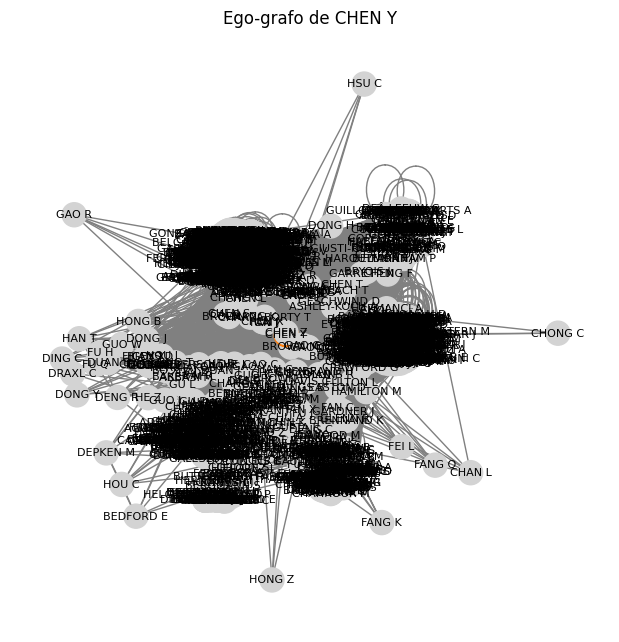

No se encontró un nodo con Label='ZHANG Z'
No se encontró un nodo con Label='KIM J'
No se encontró un nodo con Label='WANG J'
No se encontró un nodo con Label='LI Y'
No se encontró un nodo con Label='LI X'
No se encontró un nodo con Label='ZHANG X'
No se encontró un nodo con Label='LI C'


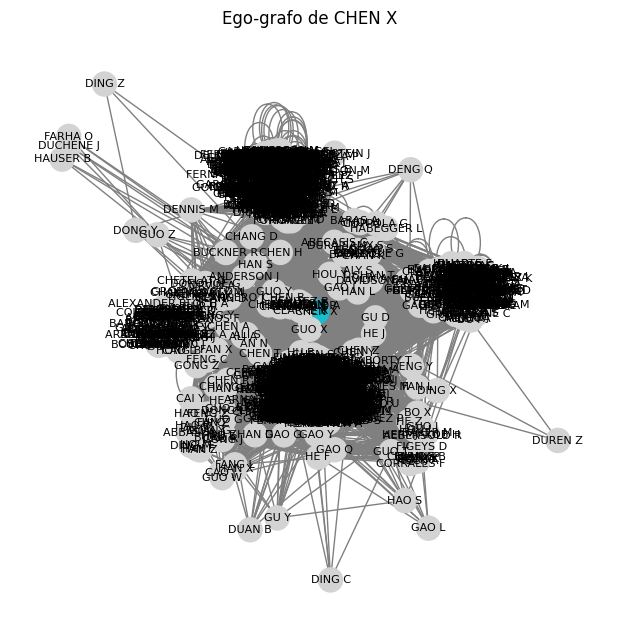

Archivo .gexf generado con atributos: Label, group y degree.


In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Leer Excel
top_authors_df = pd.read_excel(file_path, sheet_name=13)
top_10_authors = top_authors_df["authors_total"].head(10).tolist()

# Crear grafo combinado
combined_subgraph = nx.Graph()

# Paleta de colores
cmap = cm.get_cmap("tab10")
author_colors = {author: cmap(i) for i, author in enumerate(top_10_authors)}

for author in top_10_authors:
    # Buscar nodo con Label
    node = None
    for n, data in G.nodes(data=True):
        if data.get("Label") == author:
            node = n
            break

    if node is None:
        print(f"No se encontró un nodo con Label='{author}'")
        continue

    # Crear ego-grafo
    ego = nx.ego_graph(G, node, radius=1, center=True)

    # Añadir nodos y grupo
    for n in ego.nodes:
        if n not in combined_subgraph:
            combined_subgraph.add_node(n)
        combined_subgraph.nodes[n]["group"] = author

        label = G.nodes[n].get("Label", None)
        if label == author:
            combined_subgraph.nodes[n]["Label"] = label

    # Añadir aristas
    combined_subgraph.add_edges_from(ego.edges(data=True))

    # ==== Visualización ====
    pos = nx.spring_layout(ego, seed=42)
    node_colors = [author_colors[author] if n == node else "lightgray" for n in ego.nodes]

    plt.figure(figsize=(6, 6))
    nx.draw(
        ego,
        pos,
        with_labels=False,
        node_color=node_colors,
        edge_color="gray",
        node_size=300,
    )
    nx.draw_networkx_labels(
        ego,
        pos,
        labels={n: G.nodes[n]["Label"] for n in ego.nodes if G.nodes[n].get("Label")},
        font_size=8
    )
    plt.title(f"Ego-grafo de {author}")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# ====== Calcular y guardar degree ======
for n in combined_subgraph.nodes:
    combined_subgraph.nodes[n]["degree"] = combined_subgraph.degree[n]

# ====== Guardar GEXF ======
nx.write_gexf(combined_subgraph, "top_10_ego_network_colored_with_degree.gexf")
print("Archivo .gexf generado con atributos: Label, group y degree.")


In [3]:

# 1. Cargar el DataFrame de los autores
top_authors_df = pd.read_excel(file_path, sheet_name=13)

# 2. Seleccionar los 10 primeros (ajusta si el nombre de columna es distinto)
top_10_authors = top_authors_df["authors_total"].head(10).tolist()

# Diccionario donde guardaremos cada ego-network
ego_subgraphs = {}
# 3. Recorrer los autores y generar la ego-red
for i, author_label in enumerate(top_10_authors, start=1):
    # Buscamos el nodo que tenga Label == author_label
    node_of_interest = None
    for n, data in G.nodes(data=True):
        if data.get("Label") == author_label:
            node_of_interest = n
            break

    if node_of_interest is None:
        print(f"No se encontró un nodo con Label='{author_label}'")
        continue

    # Crear la ego-network
    ego_graph = nx.ego_graph(G, node_of_interest, radius=1, center=True)

    # Guardar en el diccionario con el nombre "ego_1", "ego_2", etc.
    ego_name = author_label
    ego_subgraphs[ego_name] = ego_graph

    # Información básica
    # print(f"\nCreada {ego_name} para '{author_label}'")
    # print(f" - Nodos:   {ego_graph.number_of_nodes()}")
    # print(f" - Aristas: {ego_graph.number_of_edges()}")

    # Visualización básica
    # plt.figure(figsize=(8, 6))
    # pos = nx.spring_layout(ego_graph, k=0.5, iterations=50)
    # nx.draw_networkx_nodes(ego_graph, pos, node_size=300)
    # nx.draw_networkx_edges(ego_graph, pos, alpha=0.3)
    # nx.draw_networkx_labels(ego_graph, pos, font_size=8)
    # plt.title(f"{ego_name}: {author_label}")
    # plt.axis("off")
    # plt.show()

# Al finalizar, en ego_subgraphs tienes un diccionario con 10 subgrafos:
#   - ego_subgraphs["ego_1"] => subgrafo de GHEZZI A (o quien aparezca primero en la lista)
#   - ego_subgraphs["ego_2"] => subgrafo del segundo autor
#   - ...
# etc.


No se encontró un nodo con Label='WANG Y'
No se encontró un nodo con Label='ZHANG Z'
No se encontró un nodo con Label='KIM J'
No se encontró un nodo con Label='WANG J'
No se encontró un nodo con Label='LI Y'
No se encontró un nodo con Label='LI X'
No se encontró un nodo con Label='ZHANG X'
No se encontró un nodo con Label='LI C'


In [4]:
top_authors_df = pd.read_excel(file_path, sheet_name=13)

# 2. Seleccionar los 10 primeros autores
top_10_authors = top_authors_df["authors_total"].head(10).tolist()

# Diccionario donde guardaremos cada ego-network como DataFrame
ego_networks_df = {}

# 3. Recorrer los autores y generar la ego-red en formato DataFrame
for author_label in top_10_authors:
    # Buscar el nodo correspondiente en el grafo G
    node_of_interest = None
    for n, data in G.nodes(data=True):
        if data.get("Label") == author_label:
            node_of_interest = n
            break

    if node_of_interest is None:
        print(f"No se encontró un nodo con Label='{author_label}'")
        continue

    # Crear la ego-network con radio 1
    ego_graph = nx.ego_graph(G, node_of_interest, radius=1, center=True)

    # Extraer nodos y aristas en formato DataFrame
    nodes_data = pd.DataFrame(ego_graph.nodes(data=True), columns=["Node", "Attributes"])
    edges_data = pd.DataFrame(ego_graph.edges(), columns=["Source", "Target"])

    # Unir nodos y aristas en un solo DataFrame
    ego_df = {
        "Nodes": nodes_data,
        "Edges": edges_data
    }

    # Guardar en el diccionario
    ego_networks_df[author_label] = ego_df



In [5]:
top_authors_df = pd.read_excel(file_path, sheet_name=13)

# 2. Seleccionar los 10 primeros autores
top_10_authors = top_authors_df["authors_total"].head(10).tolist()

# Diccionario para almacenar las ego-networks como DataFrames (aristas)
ego_networks_df = {}

# 3. Recorrer los autores y generar la ego-network
for author_label in top_10_authors:
    # Buscar el nodo correspondiente en el grafo G
    node_of_interest = None
    for n, data in G.nodes(data=True):
        if data.get("Label") == author_label:
            node_of_interest = n
            break

    if node_of_interest is None:
        print(f"No se encontró un nodo con Label='{author_label}'")
        continue

    # Crear la ego-network con radio 1
    ego_graph = nx.ego_graph(G, node_of_interest, radius=1, center=True)

    # Crear un DataFrame con las aristas (Source, Target)
    edges_data = pd.DataFrame(ego_graph.edges(), columns=["Source", "Target"])

    # Guardar en el diccionario
    ego_networks_df[author_label] = edges_data



In [6]:
columns_to_keep = ['id', 'Label']

AU_ego_nodes = pd.read_excel(file_path, sheet_name=21, usecols=columns_to_keep)
diccionario = AU_ego_nodes.set_index('id')['Label'].to_dict()

In [7]:
columns_to_replace = ['Source', 'Target']

for author, df in ego_networks_df.items():
    df[columns_to_replace] = df[columns_to_replace].replace(diccionario)
    ego_networks_df[author] = df

In [8]:
results = []

# Iterar sobre cada autor y su DataFrame de edges
for author, df in ego_networks_df.items():
    # Crear un grafo no dirigido
    G = nx.Graph()
    G.add_edges_from(df.values)

    # Remover auto-conexiones (self-loops)
    G.remove_edges_from(nx.selfloop_edges(G))

    # Verificar si el autor está en el grafo
    if author not in G.nodes:
        print(f"Node {author} not found in the graph.")
        results.append({"Author": author, "Network_Size": None})
        continue

    # Calcular el tamaño de la red (número de vecinos)
    network_size = len(list(G.neighbors(author)))

    # Agregar los resultados
    results.append({"Author": author, "Network_Size": network_size})

# Crear un DataFrame con los resultados
network_size_df = pd.DataFrame(results)

print(network_size_df)


    Author  Network_Size
0    LIU Y          2165
1     LI Y          2165
2   WANG Y          2575
3   WANG X          2014
4    LIU X          1617
5  ZHANG Y          2578
6  ZHANG X          1924
7   CHEN X          1587
8   WANG J          2131
9   WANG Z          1587


In [9]:
import networkx as nx
import pandas as pd
from networkx.algorithms.structuralholes import effective_size, constraint

results = []
def analizar_autor(author):

    if author not in ego_networks_df:
        print(f"Autor {author} no está en ego_networks_df.")
        return pd.DataFrame()

    df = ego_networks_df[author]

    # Crear el grafo
    G = nx.Graph()
    G.add_edges_from(df.values)
    G.remove_edges_from(nx.selfloop_edges(G))

    if author not in G:
        print(f"Node {author} not found in the graph.")
        results.append({"Author": author, "Effective_Size": None, "Constraint": None, "CDI": None})
    else:
        eff_size = effective_size(G, [author]).get(author, None)
        constr = constraint(G, [author]).get(author, None)

        neighbors = list(G.neighbors(author))
        total_collaborations = sum(G.degree[neighbor] for neighbor in neighbors)
        unique_coauthors = len(neighbors)
        duplicates = total_collaborations - unique_coauthors
        cdi = (total_collaborations - duplicates) / total_collaborations if total_collaborations > 0 else 0

        results.append({
            "Author": author,
            "Effective_Size": round(eff_size, 2),
            "Constraint": round(constr, 2),
            "CDI": round(cdi, 2)
        })   
        
    return results



In [ ]:

analizar_autor(list(ego_networks_df.keys())[0] )


In [ ]:
analizar_autor(list(ego_networks_df.keys())[1])

In [ ]:
analizar_autor(list(ego_networks_df.keys())[2])

[{'Author': 'KIM J',
  'Effective_Size': 472.08,
  'Constraint': 0.01,
  'CDI': 0.04},
 {'Author': 'GRAHAM D',
  'Effective_Size': 705.05,
  'Constraint': 0.01,
  'CDI': 0.05},
 {'Author': 'LI Y', 'Effective_Size': 705.27, 'Constraint': 0.01, 'CDI': 0.02},
 {'Author': 'MALFERTHEINER P',
  'Effective_Size': 601.46,
  'Constraint': 0.01,
  'CDI': 0.05}]

In [ ]:
analizar_autor(list(ego_networks_df.keys())[3])

[{'Author': 'KIM J',
  'Effective_Size': 472.08,
  'Constraint': 0.01,
  'CDI': 0.04},
 {'Author': 'GRAHAM D',
  'Effective_Size': 705.05,
  'Constraint': 0.01,
  'CDI': 0.05},
 {'Author': 'LI Y', 'Effective_Size': 705.27, 'Constraint': 0.01, 'CDI': 0.02},
 {'Author': 'MALFERTHEINER P',
  'Effective_Size': 601.46,
  'Constraint': 0.01,
  'CDI': 0.05},
 {'Author': 'CHEN Y',
  'Effective_Size': 603.57,
  'Constraint': 0.01,
  'CDI': 0.02}]

In [ ]:
analizar_autor(list(ego_networks_df.keys())[4])

[{'Author': 'KIM J',
  'Effective_Size': 472.08,
  'Constraint': 0.01,
  'CDI': 0.04},
 {'Author': 'GRAHAM D',
  'Effective_Size': 705.05,
  'Constraint': 0.01,
  'CDI': 0.05},
 {'Author': 'LI Y', 'Effective_Size': 705.27, 'Constraint': 0.01, 'CDI': 0.02},
 {'Author': 'MALFERTHEINER P',
  'Effective_Size': 601.46,
  'Constraint': 0.01,
  'CDI': 0.05},
 {'Author': 'CHEN Y',
  'Effective_Size': 603.57,
  'Constraint': 0.01,
  'CDI': 0.02},
 {'Author': 'GISBERT J',
  'Effective_Size': 563.61,
  'Constraint': 0.01,
  'CDI': 0.02}]

In [ ]:
analizar_autor(list(ego_networks_df.keys())[5])

[{'Author': 'KIM J',
  'Effective_Size': 472.08,
  'Constraint': 0.01,
  'CDI': 0.04},
 {'Author': 'GRAHAM D',
  'Effective_Size': 705.05,
  'Constraint': 0.01,
  'CDI': 0.05}]

In [ ]:
analizar_autor(list(ego_networks_df.keys())[6])

[{'Author': 'KIM J',
  'Effective_Size': 472.08,
  'Constraint': 0.01,
  'CDI': 0.04},
 {'Author': 'GRAHAM D',
  'Effective_Size': 705.05,
  'Constraint': 0.01,
  'CDI': 0.05},
 {'Author': 'LI Y', 'Effective_Size': 705.27, 'Constraint': 0.01, 'CDI': 0.02},
 {'Author': 'MALFERTHEINER P',
  'Effective_Size': 601.46,
  'Constraint': 0.01,
  'CDI': 0.05},
 {'Author': 'CHEN Y',
  'Effective_Size': 603.57,
  'Constraint': 0.01,
  'CDI': 0.02},
 {'Author': 'GISBERT J',
  'Effective_Size': 563.61,
  'Constraint': 0.01,
  'CDI': 0.02},
 {'Author': 'ZHANG Y',
  'Effective_Size': 843.02,
  'Constraint': 0.01,
  'CDI': 0.02}]

In [ ]:
analizar_autor(list(ego_networks_df.keys())[7])

[{'Author': 'KIM J',
  'Effective_Size': 472.08,
  'Constraint': 0.01,
  'CDI': 0.04},
 {'Author': 'GRAHAM D',
  'Effective_Size': 705.05,
  'Constraint': 0.01,
  'CDI': 0.05},
 {'Author': 'LI Y', 'Effective_Size': 705.27, 'Constraint': 0.01, 'CDI': 0.02},
 {'Author': 'MALFERTHEINER P',
  'Effective_Size': 601.46,
  'Constraint': 0.01,
  'CDI': 0.05},
 {'Author': 'CHEN Y',
  'Effective_Size': 603.57,
  'Constraint': 0.01,
  'CDI': 0.02},
 {'Author': 'GISBERT J',
  'Effective_Size': 563.61,
  'Constraint': 0.01,
  'CDI': 0.02},
 {'Author': 'ZHANG Y',
  'Effective_Size': 843.02,
  'Constraint': 0.01,
  'CDI': 0.02},
 {'Author': 'ZHOU L',
  'Effective_Size': 201.74,
  'Constraint': 0.02,
  'CDI': 0.02}]

In [ ]:
analizar_autor(list(ego_networks_df.keys())[8])

[{'Author': 'KIM J',
  'Effective_Size': 472.08,
  'Constraint': 0.01,
  'CDI': 0.04},
 {'Author': 'GRAHAM D',
  'Effective_Size': 705.05,
  'Constraint': 0.01,
  'CDI': 0.05},
 {'Author': 'LI Y', 'Effective_Size': 705.27, 'Constraint': 0.01, 'CDI': 0.02},
 {'Author': 'MALFERTHEINER P',
  'Effective_Size': 601.46,
  'Constraint': 0.01,
  'CDI': 0.05},
 {'Author': 'CHEN Y',
  'Effective_Size': 603.57,
  'Constraint': 0.01,
  'CDI': 0.02},
 {'Author': 'GISBERT J',
  'Effective_Size': 563.61,
  'Constraint': 0.01,
  'CDI': 0.02},
 {'Author': 'ZHANG Y',
  'Effective_Size': 843.02,
  'Constraint': 0.01,
  'CDI': 0.02},
 {'Author': 'ZHOU L',
  'Effective_Size': 201.74,
  'Constraint': 0.02,
  'CDI': 0.02},
 {'Author': 'YAMAOKA Y',
  'Effective_Size': 531.38,
  'Constraint': 0.01,
  'CDI': 0.05}]

In [ ]:
analizar_autor(list(ego_networks_df.keys())[9])

[{'Author': 'KIM J',
  'Effective_Size': 472.08,
  'Constraint': 0.01,
  'CDI': 0.04},
 {'Author': 'GRAHAM D',
  'Effective_Size': 705.05,
  'Constraint': 0.01,
  'CDI': 0.05},
 {'Author': 'LI Y', 'Effective_Size': 705.27, 'Constraint': 0.01, 'CDI': 0.02},
 {'Author': 'MALFERTHEINER P',
  'Effective_Size': 601.46,
  'Constraint': 0.01,
  'CDI': 0.05},
 {'Author': 'CHEN Y',
  'Effective_Size': 603.57,
  'Constraint': 0.01,
  'CDI': 0.02},
 {'Author': 'GISBERT J',
  'Effective_Size': 563.61,
  'Constraint': 0.01,
  'CDI': 0.02},
 {'Author': 'ZHANG Y',
  'Effective_Size': 843.02,
  'Constraint': 0.01,
  'CDI': 0.02},
 {'Author': 'ZHOU L',
  'Effective_Size': 201.74,
  'Constraint': 0.02,
  'CDI': 0.02},
 {'Author': 'YAMAOKA Y',
  'Effective_Size': 531.38,
  'Constraint': 0.01,
  'CDI': 0.05},
 {'Author': 'CHEN C',
  'Effective_Size': 291.98,
  'Constraint': 0.01,
  'CDI': 0.02}]

In [ ]:
metrics_df = pd.DataFrame(results)
print(metrics_df)

            Author  Effective_Size  Constraint   CDI
0            KIM J          472.08        0.01  0.04
1         GRAHAM D          705.05        0.01  0.05
2             LI Y          705.27        0.01  0.02
3  MALFERTHEINER P          601.46        0.01  0.05
4           CHEN Y          603.57        0.01  0.02
5        GISBERT J          563.61        0.01  0.02
6          ZHANG Y          843.02        0.01  0.02
7           ZHOU L          201.74        0.02  0.02
8        YAMAOKA Y          531.38        0.01  0.05
9           CHEN C          291.98        0.01  0.02


In [ ]:
# Cargar datos
authors_citations = pd.read_excel(file_path, sheet_name=0, usecols=['AU', 'TC'])

# Lista de autores de interés
authors_of_interest = top_10_authors  # Asegúrate de tener esta variable definida

# Crear diccionarios para almacenar las métricas
author_tc = {author: 0 for author in authors_of_interest}
h_index_results = {}

# 1. Calcular el total de citas por autor
for _, row in authors_citations.iterrows():
    authors = [author.strip() for author in row['AU'].split(';')]  # Separar y limpiar
    tc = row['TC']  # Número de citas

    # Sumar citas solo si el autor está en la lista de interés
    for author in authors:
        if author in author_tc:
            author_tc[author] += tc

# 2. Calcular el h-index para cada autor
for author in authors_of_interest:
    # Filtrar las filas donde aparece el autor
    author_papers = authors_citations[authors_citations['AU'].str.contains(author, case=False, na=False)]

    # Obtener lista de citaciones y ordenarlas en orden descendente
    citations = sorted(author_papers['TC'], reverse=True)

    # Calcular el h-index
    h_index = sum(1 for i, c in enumerate(citations, start=1) if c >= i)

    # Guardar el resultado
    h_index_results[author] = h_index

# 3. Crear DataFrame unificado con ambas métricas
df_combined = pd.DataFrame({
    'Author': authors_of_interest,
    'Total Citations': [author_tc[author] for author in authors_of_interest],
    'H-Index': [h_index_results[author] for author in authors_of_interest]
})

# Mostrar el resultado
print(df_combined)

            Author  Total Citations  H-Index
0            KIM J              831       11
1             LI Y              505        8
2  MALFERTHEINER P             3753       14
3           CHEN Y             1271        8
4        GISBERT J             2801        9
5         GRAHAM D             4493       16
6          ZHANG Y              310        5
7           ZHOU L             1539       12
8        YAMAOKA Y              819       12
9           CHEN C              794        8


In [ ]:

# Cargar datos
authors_citations = pd.read_excel(file_path, sheet_name=0, usecols=['AU', 'TC'])
table_4_authors = pd.read_excel(file_path, sheet_name=13)
papers_total = table_4_authors[["authors_total", "papers_total"]].head(10)

# Convertir papers_total a un diccionario para fácil acceso
papers_dict = dict(zip(papers_total['authors_total'], papers_total['papers_total']))

# Lista de autores de interés
authors_of_interest = top_10_authors  # Asegúrate de tener esta variable definida

# Crear diccionarios para almacenar las métricas
author_tc = {author: 0 for author in authors_of_interest}
h_index_results = {}

# 1. Calcular el total de citas por autor
for _, row in authors_citations.iterrows():
    authors = [author.strip() for author in row['AU'].split(';')]  # Separar y limpiar
    tc = row['TC']  # Número de citas

    # Sumar citas solo si el autor está en la lista de interés
    for author in authors:
        if author in author_tc:
            author_tc[author] += tc

# 2. Calcular el h-index para cada autor
for author in authors_of_interest:
    # Filtrar las filas donde aparece el autor
    author_papers = authors_citations[authors_citations['AU'].str.contains(author, case=False, na=False)]

    # Obtener lista de citaciones y ordenarlas en orden descendente
    citations = sorted(author_papers['TC'], reverse=True)

    # Calcular el h-index
    h_index = sum(1 for i, c in enumerate(citations, start=1) if c >= i)

    # Guardar el resultado
    h_index_results[author] = h_index

# 3. Crear DataFrame unificado con todas las métricas
df_combined = pd.DataFrame({
    'Author': authors_of_interest,
    'Papers Total': [papers_dict.get(author, 0) for author in authors_of_interest],  # Usar get para manejar autores que no están en papers_dict
    'Total Citations': [author_tc[author] for author in authors_of_interest],
    'H-Index': [h_index_results[author] for author in authors_of_interest]
})

# Mostrar el resultado
print(df_combined)

            Author  Papers Total  Total Citations  H-Index
0            KIM J            26              831       11
1             LI Y            23              505        8
2  MALFERTHEINER P            19             3753       14
3           CHEN Y            18             1271        8
4        GISBERT J            17             2801        9
5         GRAHAM D            17             4493       16
6          ZHANG Y            17              310        5
7           ZHOU L            17             1539       12
8        YAMAOKA Y            14              819       12
9           CHEN C            13              794        8


In [ ]:
authors_table = pd.merge(df_combined, metrics_df, on='Author', how='right' )

In [ ]:
authors_table

,Author,Papers Total,Total Citations,H-Index,Effective_Size,Constraint,CDI
0,KIM J,26,831,11,472.08,0.01,0.04
1,GRAHAM D,17,4493,16,705.05,0.01,0.05
2,LI Y,23,505,8,705.27,0.01,0.02
3,MALFERTHEINER P,19,3753,14,601.46,0.01,0.05
4,CHEN Y,18,1271,8,603.57,0.01,0.02
5,GISBERT J,17,2801,9,563.61,0.01,0.02
6,ZHANG Y,17,310,5,843.02,0.01,0.02
7,ZHOU L,17,1539,12,201.74,0.02,0.02
8,YAMAOKA Y,14,819,12,531.38,0.01,0.05
9,CHEN C,13,794,8,291.98,0.01,0.02


In [ ]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from docx import Document

# Cargar el DataFrame (ejemplo: cargando desde un CSV)
df = authors_table

# Crear un documento de Word
doc = Document()

# Añadir un título
doc.add_heading("Tabla de Resultados", level=1)

# Crear la tabla con el número de filas +1 (para encabezado) y columnas
table = doc.add_table(rows=df.shape[0] + 1, cols=df.shape[1])

# Aplicar formato a la tabla
table.style = "Table Grid"

# Insertar los encabezados
for j, column_name in enumerate(df.columns):
    table.cell(0, j).text = column_name  # Primera fila con los nombres de columnas

# Insertar los datos
for i, row in df.iterrows():
    for j, value in enumerate(row):
        table.cell(i + 1, j).text = str(value)  # Llenar con valores del DataFrame

# Guardar el documento
output_filename = "tabla_autores.docx"
doc.save(output_filename)
print(f"Tabla guardada en {output_filename}")

NameError: name 'authors_table' is not defined